# Figure 5: Denmark Strait freshwater transport adjoint sensitivities

This notebook will reproduce Figure 5 from  E. Boland et al. 2025 (doi to come). This requires input datafiles (expects to find them in ../data_out) to run - please see the README for details.

Please attribute any plots or code from this notebook using the DOI from Zenodo: TO COME

E Boland Jan 2025 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
import scipy.stats as stats
import cartopy.crs as ccrs
import sys
sys.path.insert(0,'/users/emmomp/Python/ECCOv4-py')
import ecco_v4_py as ecco
sys.path.insert(0,'/users/emmomp/Python')
import xadjoint as xad
import utils as ut
import calendar
from inputs import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
mths=['Mar','Jun','Sep','Dec']
adj_freq=604800
nt=260
adj_vars=['adxx_qnet','adxx_empmr','adxx_tauu','adxx_tauv']

lags=[0,-0.25,-0.5,-1.5,-4]
lag_labels=['0 to -3m lag','-3m to -6m lag','-6m to -18m lag','-18m to -4 y lag','0 to -4y lag']
lag_lengths=[lags[i]-lags[i+1] for i in range(0,len(lags)-1)]
lag_lengths=lag_lengths+[4,]

In [3]:
#xmin,xmax,ymin,ymax=(-2266791.253073855,
# 3358349.2597455736,
# -2166791.253073855,
# 3458349.2597455736)
xmin,xmax,ymin,ymax=(-2766791.253073855,
 3358349.2597455736,
 -3566791.253073855,
 3458349.2597455736)
proj_dict={'projection_type':'ortho','user_lon_0':-45,'user_lat_0':70}
my_projn = ccrs.Orthographic(central_longitude=-45,central_latitude=70)
[section_pt1,section_pt2]=ecco.get_section_endpoints('Denmark Strait')

In [4]:
mean_ssh=xr.open_dataarray(f'{DATA_DIR}/eccov4_meanssh.nc')
ds_ca_monvar=xr.open_dataset(f'{DATA_DIR}/eccov4_varbybasin.nc')
ds_climanom=xr.open_dataset(f'{EXPDIR}/fwd_26y/exf_climanoms.nc')
ds_ca_seasvar=ds_climanom.groupby(ds_climanom.time.dt.season).var('time')

In [5]:
Niland=(ecco_grid.XC>-20)&(ecco_grid.XC<-11)&(ecco_grid.YC>64.5)&(ecco_grid.YC<68)
Siland=(ecco_grid.XC>-25)&(ecco_grid.XC<-15)&(ecco_grid.YC>62)&(ecco_grid.YC<65)
Ntauu=(ds_climanom['oceTAUU']*ecco_grid.rA).where(Niland).sum(['tile','j','i'])/ecco_grid.rA.where(Niland).sum(['tile','j','i'])
Stauu=(ds_climanom['oceTAUU']*ecco_grid.rA).where(Siland).sum(['tile','j','i'])/ecco_grid.rA.where(Siland).sum(['tile','j','i'])

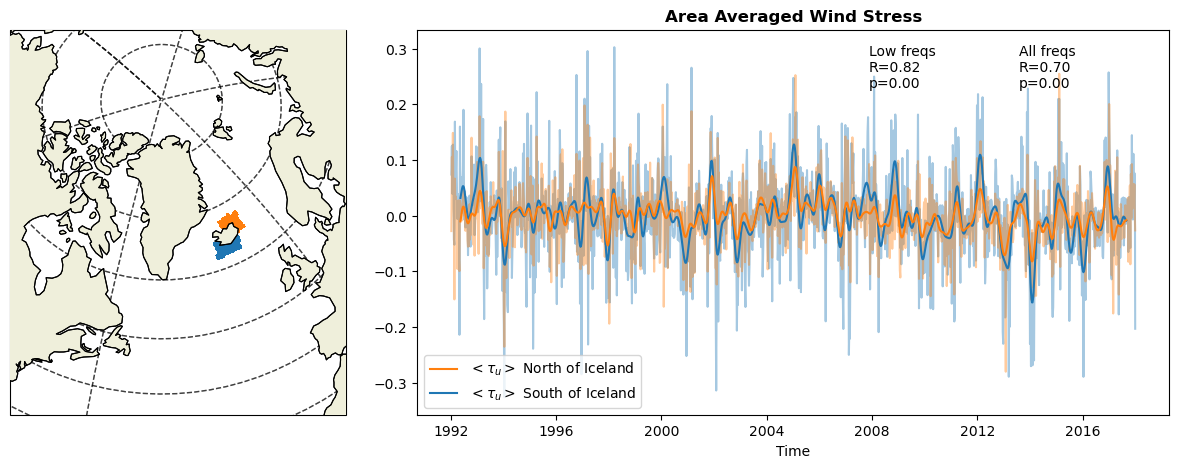

In [14]:
colors=plt.get_cmap('tab10')
plt.figure(figsize=[15,5])
ax=plt.subplot2grid((1, 3), (0, 0), colspan=1,projection=my_projn)
da=2*Niland.astype('int')+Siland.astype('int')
da_plot=xr.where(da==0,np.nan,da)
[f,ax,p]=ut.plot_ecco(ecco_grid,da_plot,**proj_dict,cmap='tab10',cmin=1,cmax=11,ax=ax,show_colorbar=False)
ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)

[r_m,p_m]=stats.pearsonr(Ntauu.sel(time=slice('1996-01-01',None)),Stauu.sel(time=slice('1996-01-01',None)))
[r_y,p_y]=stats.pearsonr(ut.butter_ufunc(Ntauu,18,'time')[18:-18],ut.butter_ufunc(Stauu,18,'time')[18:-18])
ax=plt.subplot2grid((1, 3), (0, 1), colspan=2)
Stauu.plot(alpha=0.4,color=colors(0),ax=ax)
Ntauu.plot(alpha=0.4,color=colors(1),ax=ax)
p2=ut.butter_ufunc(Stauu,18,'time')[18:-18].plot(color=colors(0))[0]
p1=ut.butter_ufunc(Ntauu,18,'time')[18:-18].plot(color=colors(1))[0]
plt.legend([p1,p2],['$<\\tau_u>$ North of Iceland','$<\\tau_u>$ South of Iceland'])
plt.title('Area Averaged Wind Stress',fontsize=12,fontweight='bold')
plt.text(0.8,0.85,f'All freqs\nR={r_m:1.2f}\np={p_m:1.2f}',transform=ax.transAxes)
plt.text(0.6,0.85,f'Low freqs\nR={r_y:1.2f}\np={p_y:1.2f}',transform=ax.transAxes)
plt.savefig(f'../plots/supfig_IcelandWindStress.pdf')

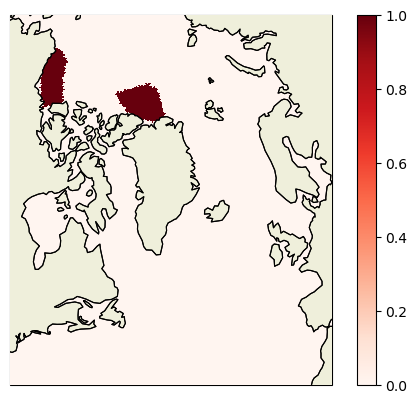

In [54]:
NGland=(ecco_grid.XC<-30)&(ecco_grid.XC>-120)&(ecco_grid.YC>83)&(ecco_grid.YC<89)
NAlaska_mask=((ecco_grid.XC<-125)&(ecco_grid.XC>-158)&(ecco_grid.YC>70)&(ecco_grid.YC<74))
Bering_mask=(ecco_grid.XC<-154)&(ecco_grid.YC>73)
Bfort=NAlaska_mask&~Bering_mask

[f,ax,p]=ut.plot_ecco(ecco_grid,(NGland.astype('int')+Bfort.astype('int')),**proj_dict,cmap='Reds',cmin=0,cmax=1)
ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)

In [58]:
NGland_tauv=(ds_climanom['oceTAUV']*ecco_grid.rA).where(NGland).sum(['tile','j','i'])/ecco_grid.rA.where(NGland).sum(['tile','j','i'])
Bfort_tauu=(ds_climanom['oceTAUU']*ecco_grid.rA).where(Bfort).sum(['tile','j','i'])/ecco_grid.rA.where(Bfort).sum(['tile','j','i'])

Text(0.6, 0.85, 'Low freqs\nR=0.43\np=0.00')

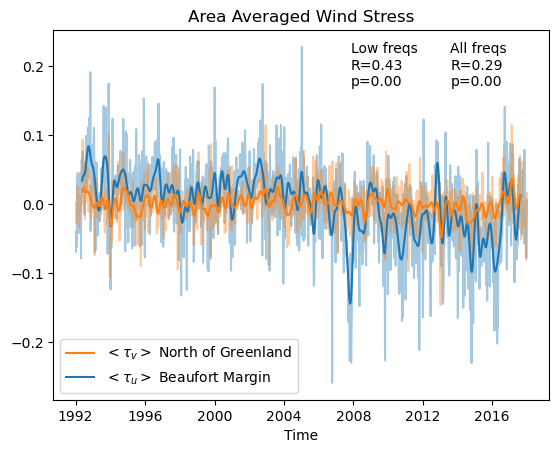

In [77]:
[r_m,p_m]=stats.pearsonr(NGland_tauv.sel(time=slice('1996-01-01',None)),Bfort_tauu.sel(time=slice('1996-01-01',None)))
[r_y,p_y]=stats.pearsonr(ut.butter_ufunc(NGland_tauv,18,'time')[18:-18],ut.butter_ufunc(Bfort_tauu,18,'time')[18:-18])
plt.figure()
Bfort_tauu.plot(alpha=0.4,color=colors(0))
NGland_tauv.plot(alpha=0.4,color=colors(1))
p2=ut.butter_ufunc(Bfort_tauu,18,'time')[18:-18].plot(color=colors(0))[0]
p1=ut.butter_ufunc(NGland_tauv,18,'time')[18:-18].plot(color=colors(1))[0]
plt.legend([p1,p2],['$<\\tau_v>$ North of Greenland','$<\\tau_u>$ Beaufort Margin'])
plt.title('Area Averaged Wind Stress')
plt.text(0.8,0.85,f'All freqs\nR={r_m:1.2f}\np={p_m:1.2f}',transform=plt.gca().transAxes)
plt.text(0.6,0.85,f'Low freqs\nR={r_y:1.2f}\np={p_y:1.2f}',transform=plt.gca().transAxes)


In [9]:
masks=ut.load_canari_masks()

get_basin_name:  ['atl'] /users/emmomp/Python/ECCOv4-py/binary_data
load_binary_array: loading file /users/emmomp/Python/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
get_basin_name:  ['arct'] /users/emmomp/Python/ECCOv4-py/binary_data
load_binary_array: loading file /users/emmomp/Python/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
get_basin_name:  ['hudson'] /users/emmomp/Python/ECCOv4-py/bina

In [10]:
masks_plot_map=['gland','natl','arct','norw','hudson', 'north', 'baffin','barents']
mask_da=xr.zeros_like(masks['global'])
for ib,basin in enumerate(masks_plot_map):
    mask_da=mask_da+masks[basin]*(ib+1)
mask_da=xr.where(mask_da==0,np.nan,mask_da)

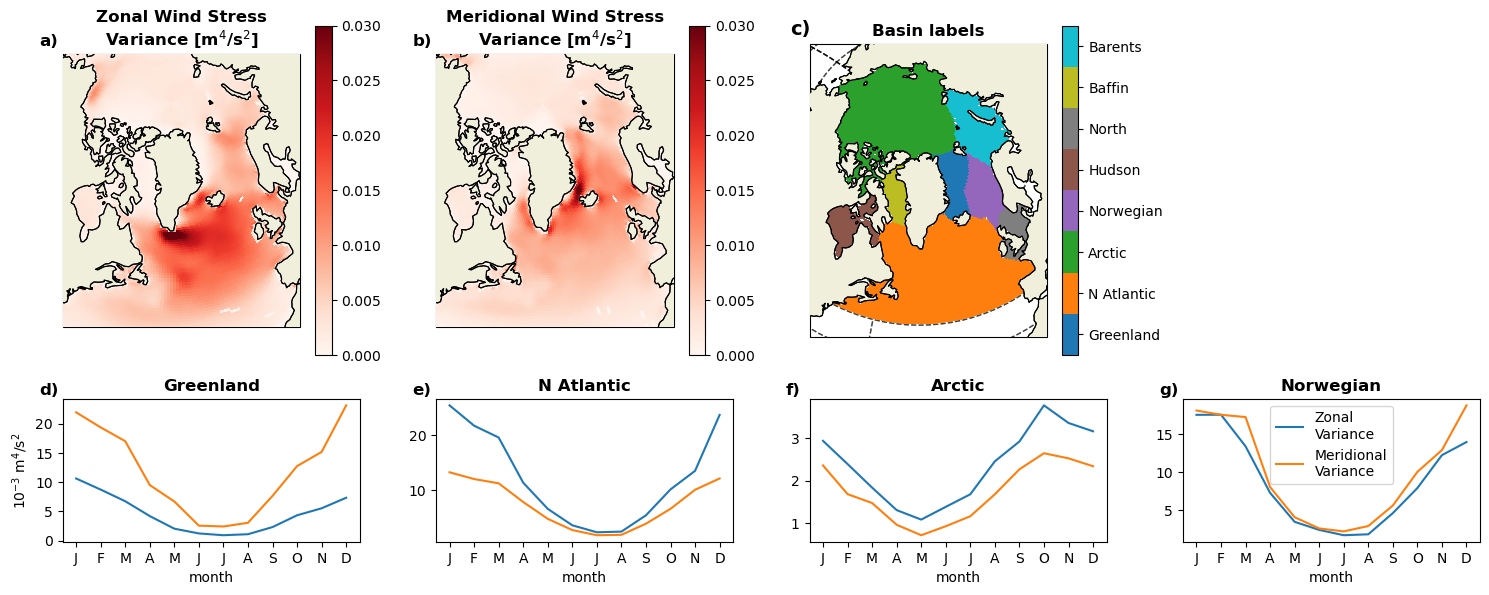

In [13]:
masks_plot=['gland','natl','arct','norw']
cmap=plt.get_cmap('tab10')(np.linspace(0,1,8))
new_cmap = colors.ListedColormap(cmap)

var_clims=dict(zip(adj_vars,[15e3,2e-14,0.03,0.03]))
var_label=['Zonal','Meridional']

plt.figure(figsize=[15,6])

pp=1
for iv,var in enumerate(adj_vars[2:]):
    ax=plt.subplot2grid((3, 4), (0, pp-1), rowspan=2,projection=my_projn)
    var_var=ds_climanom[adj_diag_map[var][0]].sel(time=slice('1996-01-01',None)).var('time')
    [f,ax,p]=ut.plot_ecco(ecco_grid,var_var,ax=ax,
                       **proj_dict,rasterized=True,
                       cmin=0,cmax=var_clims[var],cmap='Reds'
                      )    
    ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
   # ax.text(-0.1,0.5,f'{var_label[iv]}',transform=ax.transAxes,rotation='vertical',ha='center',va='center',fontweight='bold')
    plt.text(-0.1,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
    plt.title(f'{var_label[iv]} Wind Stress\nVariance [m$^4$/s$^2$]',fontsize=12,fontweight='bold')
    pp+=1

#ax=plt.subplot(2,4,pp,projection=my_projn)
ax=plt.subplot2grid((3, 4), (0, pp-1), rowspan=2,projection=my_projn)
[f,ax,p]=ut.plot_ecco(ecco_grid,mask_da,cmap=new_cmap,cmin=0.5,cmax=8.5,**proj_dict,show_colorbar=False,ax=ax,rasterized=True)
sm = plt.cm.ScalarMappable(cmap=new_cmap)
sm._A = []
cb = plt.colorbar(sm,ax=ax)
cb.set_ticks(list(np.arange(1/16,17/16,1/8)))
ticks=cb.ax.set_yticklabels([masks_labels[m] for m in masks_plot_map])
ax.set_extent([-3e6,3.5e6,-3.5e6,4.5e6], crs=my_projn)
plt.text(-0.08,1.03,f'{chr(96+pp)})',transform=ax.transAxes,fontsize=14,fontweight='bold')
plt.title('Basin labels',fontsize=12,fontweight='bold')

pp=5
for im,mask in enumerate(masks_plot):
    ax=plt.subplot2grid((3, 4), (2, im))
   # ax=plt.subplot(2,4,pp)
    (1e3*ds_ca_monvar['oceTAUU']).sel(stat='sum',mask=mask).plot(ax=ax)
    (1e3*ds_ca_monvar['oceTAUV']).sel(stat='sum',mask=mask).plot(ax=ax)
    if im==0:
        plt.ylabel('10$^{-3}$ m$^4$/s$^2$')
    else:
        plt.ylabel('')
    plt.title(masks_labels[mask],fontsize=12,fontweight='bold')
    plt.text(-0.08,1.03,f'{chr(95+pp)})',transform=ax.transAxes,fontsize=12,fontweight='bold')
    if im==3:
        plt.legend([f'Zonal\nVariance',f'Meridional\nVariance'])
    plt.xticks(range(1,13),[m[0] for m in mth])
    pp+=1

#plt.suptitle('Basin Mean Wind Stress Variance',fontsize=12,fontweight='bold')
plt.tight_layout()
plt.savefig(f'../plots/fig5_varseas_basinmap.pdf')

In [5]:
ds_all={}
for mth in mths:
    ds_all[mth]={}
    for year in eyears:
        expt=f'ad_5y_denstr_horflux_fw_{mth}_noparam_7d_{year}/'
        startdate=f'{int(year)-4}-01-01'
        lag0=f'{year}-{mthi[mth]:02.0f}-{calendar.monthrange(int(year),mthi[mth])[1]}'
        print(expt,startdate,lag0)
        myexp = xad.Experiment(GRIDDIR,f'{EXPDIR}/{expt}',start_date=startdate,lag0=lag0,nt=nt,adj_freq=adj_freq)
        myexp.load_vars(['adxx_qnet','adxx_tauu','adxx_tauv','adxx_empmr'])
    
        myexp.data['adxx_tauu']=-myexp.data['adxx_tauu'].rename({'i_g':'i'})
        myexp.data['adxx_tauv']=-myexp.data['adxx_tauv'].rename({'j_g':'j'})
    
        myexp.data=myexp.data.assign_coords({'eyear':year,'month':mth,'fc':myexp.fc}).swap_dims({'time':'lag_years'})
        ds_all[mth][year]=myexp.data
#ds_all

ad_5y_denstr_horflux_fw_Mar_noparam_7d_2006/ 2002-01-01 2006-03-31
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_horflux_fw_Mar_noparam_7d_2014/ 2010-01-01 2014-03-31
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_horflux_fw_Mar_noparam_7d_2000/ 1996-01-01 2000-03-31
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_horflux_fw_Jun_noparam_7d_2006/ 2002-01-01 2006-06-30
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_horflux_fw_Jun_noparam_7d_2014/ 2010-01-01 2014-06-30
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_ho

In [6]:
ds_plot_all=[]
for iv,var in enumerate(adj_vars):
    ds_plot_exp=[]
    for mth in mths:
        ds_plot_mth=[]
        for year in eyears:
            ds_plot_year=[]
            for ilag in range(0,len(lags)-1):
                ds_plot=ds_all[mth][year][var].sel(lag_years=slice(lags[ilag+1],lags[ilag])).mean('lag_years').squeeze()
                ds_plot['lag_range']=lag_labels[ilag]
                ds_plot_year.append(ds_plot)
            ilag+=1
            ds_plot=ds_all[mth][year][var].sel(lag_years=slice(lags[-1],0)).mean('lag_years').squeeze()
            ds_plot['lag_range']=lag_labels[-1]
            ds_plot_year.append(ds_plot)
            ds_plot_mth.append(xr.concat(ds_plot_year,'lag_range'))
        ds_plot_exp.append(xr.concat(ds_plot_mth,'eyear'))
    ds_plot_exp=xr.concat(ds_plot_exp,'month')
    ds_plot_exp.name=var
    ds_plot_all.append(ds_plot_exp)
ds_plot_all=xr.merge(ds_plot_all).load()
ds_plot_all

<xarray.Dataset> Size: 101MB
Dimensions:     (tile: 13, j: 90, i: 90, eyear: 3, month: 4, lag_range: 5)
Coordinates:
  * tile        (tile) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j           (j) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * i           (i) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * eyear       (eyear) <U4 48B '2006' '2014' '2000'
  * month       (month) <U3 48B 'Mar' 'Jun' 'Sep' 'Dec'
    fc          (month, eyear) float64 96B -8.207e+04 -6.799e+04 ... -8.126e+04
  * lag_range   (lag_range) <U16 320B '0 to -3m lag' ... '0 to -4y lag'
Data variables:
    adxx_qnet   (month, eyear, lag_range, tile, j, i) float32 25MB 0.0 ... 0.0
    adxx_empmr  (month, eyear, lag_range, tile, j, i) float32 25MB 0.0 ... 0.0
    adxx_tauu   (month, eyear, lag_range, tile, j, i) float32 25MB 0.0 ... 0.0
    adxx_tauv   (month, eyear, lag_range, tile, j, i) float32 25MB 0.0 ... 0.0

In [7]:
ds_plot_contr=[]
for year in eyears:
    ds_plot=xr.open_mfdataset(f'{CONTR_DIR}/{year}/ecco_2dconvs_{year}*nc',concat_dim='lag_range',combine='nested')
    ds_plot['exp']=[str(x) for x in ds_plot.exp.data]
    ds_plot_contr.append(ds_plot.assign_coords({'eyear':year}).swap_dims({'exp':'month'}).drop_vars('exp'))
ds_plot_contr=xr.concat(ds_plot_contr,'eyear',coords='minimal')
ds_plot_contr['wind_OCE']=ds_plot_contr['adxx_tauuXoceTAUU']+ds_plot_contr['adxx_tauvXoceTAUV']
ds_plot_contr=ds_plot_contr.stack({'ym':['month','year']}).sortby('dates')

In [8]:
xmin,xmax,ymin,ymax=(-2266791.253073855,
 3358349.2597455736,
 -2166791.253073855,
 3458349.2597455736)
proj_dict={'projection_type':'ortho','user_lon_0':-45,'user_lat_0':70}
my_projn = ccrs.Orthographic(central_longitude=-45,central_latitude=70)
[section_pt1,section_pt2]=ecco.get_section_endpoints('Denmark Strait')

In [9]:
clims=dict(zip(adj_vars,[[20e-3,20e-3,10e-3,5e-3],[5e4,3e4,1e4,4e3],[150,30,10,3.5],[150,30,10,3.5]]))
var_clims=dict(zip(adj_vars,[15e3,2e-14,0.03,0.03]))

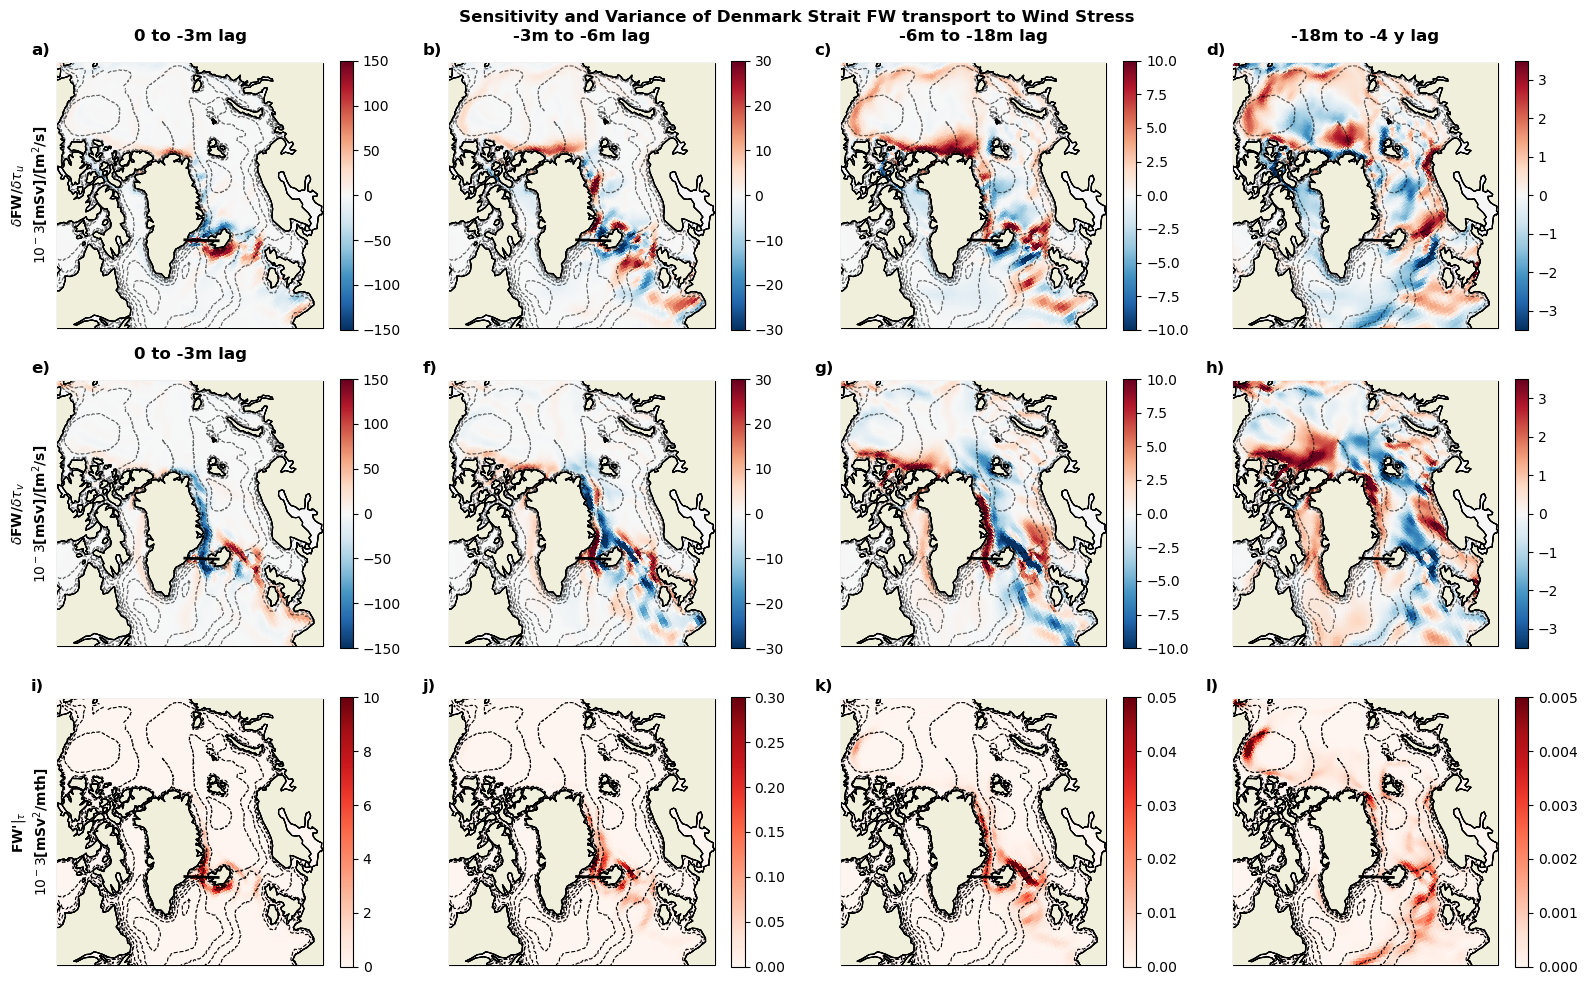

In [10]:
math_label=['$\delta$FW/$\delta \\tau_u$','$\delta$FW/$\delta \\tau_v$','FW\'$|_{\\tau}$']
var_label=['$\\sigma^2(\\tau_u)$','$\\sigma^2(\\tau_v)$']
fig=plt.figure(figsize=[16,10])
pp=1
for iv,var in enumerate(adj_vars[2:]): 
    mth_mean=-ds_plot_all[var].mean(['eyear','month'])
    var_var=ds_climanom[adj_diag_map[var][0]].sel(time=slice('1996-01-01',None)).var('time')
    for ilag in range(0,len(lags)-1):
        [f,ax,p]=ut.plot_ecco(ecco_grid,mth_mean.isel(lag_range=ilag),subplot_grid=[3,4,pp],
                           **proj_dict,rasterized=True,
                           cmin=-clims[var][ilag],cmax=clims[var][ilag]
                          )
        [f,ax,p]=ut.plot_ecco(ecco_grid,mean_ssh,ax=ax,
                                  plot_type='contour',colors='k',mapping_method='bin_average',
                                  cmap=None,negative_linestyles='dashed',linewidths=0.8,
                                  levels=np.arange(-1.4,0,0.10),show_colorbar=False,alpha=0.6,
                                  **proj_dict)
        ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
        ax.plot([section_pt1[0],section_pt2[0]],[section_pt1[1],section_pt2[1]],
             color='k', linewidth=2,transform=ccrs.PlateCarree(),zorder=1000)
        plt.text(-0.1,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        if pp<6:
            plt.title(lag_labels[ilag],fontsize=12,fontweight='bold',y=1.05)
        if ilag==0:
            ax.text(-0.1,0.5,f'{math_label[iv]}\n$10^{-3}$[mSv]/[m$^2$/s]',transform=ax.transAxes,rotation='vertical',ha='center',va='center',fontweight='bold')
        pp+=1
  #  [f,ax,p]=ut.plot_ecco(ecco_grid,var_var,subplot_grid=[3,5,pp],
  #                     **proj_dict,rasterized=True,
  #                     cmin=0,cmax=var_clims[var],cmap='Reds'
  #                    )    
  #  ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
   # ax.text(-0.1,0.5,f'{var_label[iv]}',transform=ax.transAxes,rotation='vertical',ha='center',va='center',fontweight='bold')
   # plt.text(-0.1,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
  #  if pp<6:
  #      plt.title(f'Wind Stress\nVariance [m$^4$/s$^2$]',fontsize=12,fontweight='bold',y=1.05)
 #   pp+=1

var='wind_OCE'
clims_var=[10,0.3,0.05,0.005]
mth_mean=(ds_plot_contr[var]/1e3).var('ym').mean('eyear')*1e3
for ilag,lag in enumerate(lag_labels[:-1]):
    [f,ax,p]=ut.plot_ecco(ecco_grid,(mth_mean.sel(lag_range=lag))/(12*lag_lengths[ilag]),subplot_grid=[3,4,pp],
                       **proj_dict,cmap='Reds',rasterized=True,
                       cmin=0,cmax=clims_var[ilag]
                      )
    [f,ax,p]=ut.plot_ecco(ecco_grid,mean_ssh,ax=ax,
                        plot_type='contour',colors='k',mapping_method='bin_average',
                        cmap=None,negative_linestyles='dashed',linewidths=0.8,
                        levels=np.arange(-1.4,0,0.10),show_colorbar=False,
                        **proj_dict)
    ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
    ax.plot([section_pt1[0],section_pt2[0]],[section_pt1[1],section_pt2[1]],
         color='k', linewidth=2,transform=ccrs.PlateCarree(),zorder=1000)
    if pp<5:
        plt.title(lag,fontsize=12,fontweight='bold')
    plt.text(-0.1,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
    if ilag==0:
        ax.text(-0.1,0.5,f'{math_label[-1]}\n$10^{-3}$[mSv$^2$/mth]',transform=ax.transAxes,rotation='vertical',ha='center',va='center',fontweight='bold')
    pp+=1
    
plt.suptitle('Sensitivity and Variance of Denmark Strait FW transport to Wind Stress ',fontsize=12,fontweight='bold')
plt.tight_layout()
plt.savefig('../plots/fig5_meanwindstress_adxxvar_vslag.pdf')

KeyError: 'adxx_qnet'

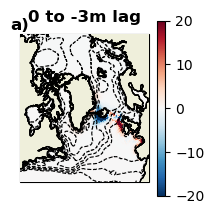

In [11]:
fig=plt.figure(figsize=[12,5])
pp=1
for iv,var in enumerate(adj_vars[:2]): 
    mth_mean=1e3*ds_plot_all[var].mean(['eyear','month'])
    var_var=ds_climanom[adj_diag_map[var][0]].sel(time=slice('1996-01-01',None)).var('time')
    for ilag in range(0,len(lags)-1):
        [f,ax,p]=ut.plot_ecco(ecco_grid,mth_mean.isel(lag_range=ilag),subplot_grid=[2,5,pp],
                           **proj_dict,rasterized=True,
                           cmin=-clims[var][ilag]*1e3,cmax=clims[var][ilag]*1e3
                          )
        [f,ax,p]=ut.plot_ecco(ecco_grid,mean_ssh,ax=ax,
                                  plot_type='contour',colors='k',mapping_method='bin_average',
                                  cmap=None,negative_linestyles='dashed',linewidths=0.8,
                                  levels=np.arange(-1.4,0,0.10),show_colorbar=False,
                                  **proj_dict)
        ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
        ax.plot([section_pt1[0],section_pt2[0]],[section_pt1[1],section_pt2[1]],
             color='k', linewidth=2,transform=ccrs.PlateCarree(),zorder=1000)
        plt.text(-0.08,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        if pp<6:
            plt.title(lag_labels[ilag],fontsize=12,fontweight='bold',y=1.03)
        if ilag==0:
            ax.text(-0.15,0.5,f'{exf_labels[var]}\n-mSv/[{exf_units[var]}]',transform=ax.transAxes,rotation='vertical',ha='center',va='center',fontweight='bold')
        pp+=1
    [f,ax,p]=ut.plot_ecco(ecco_grid,var_var,subplot_grid=[2,5,pp],
                       **proj_dict,rasterized=True,
                       cmin=0,cmax=var_clims[var],cmap='Reds'
                      )    
    ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
    plt.text(-0.08,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
    if pp<6:
        plt.title('Variance',fontsize=12,fontweight='bold',y=1.03)
    pp+=1
    
plt.suptitle(f'Mean Sensitivity of Denmark Strait FW transport to Buoyancy Forcing',fontsize=12,fontweight='bold',x=0.4,y=0.96)
plt.tight_layout()
plt.savefig('../plots/fig5_meanbuoyancyadxx_vslag.pdf')

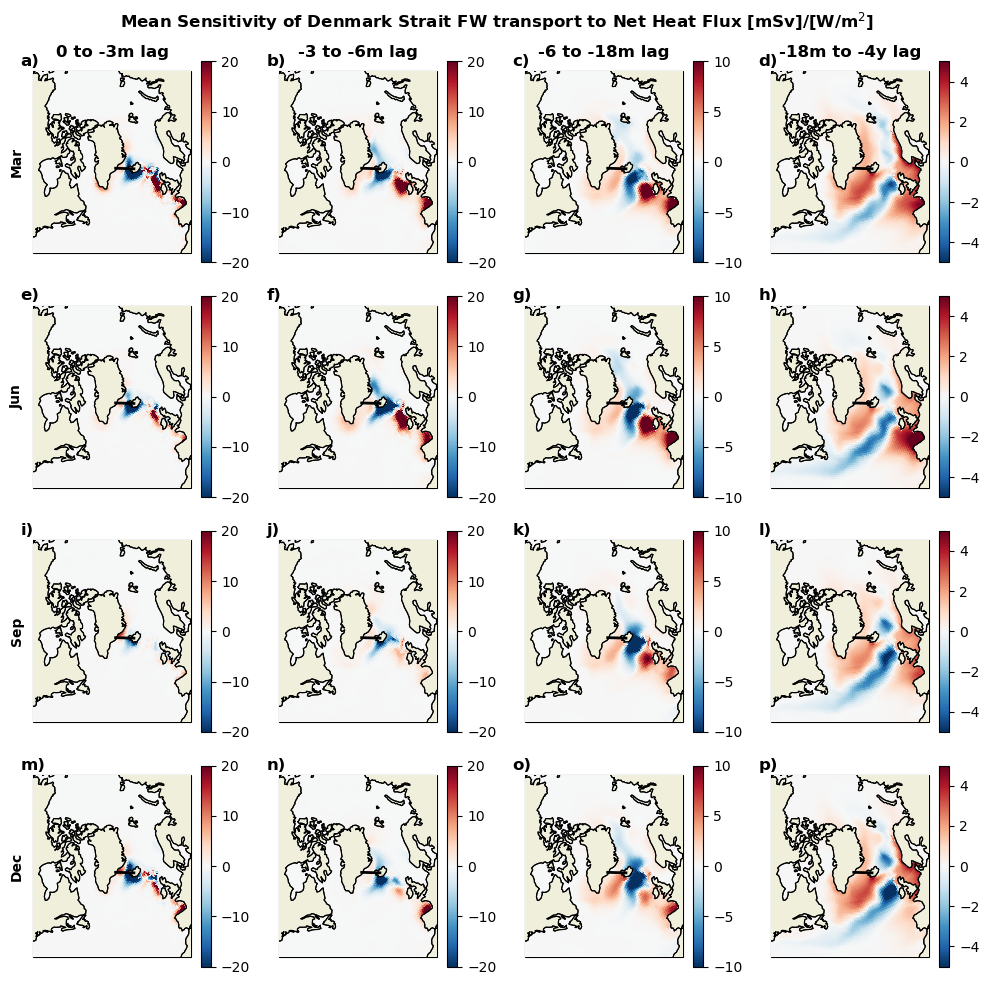

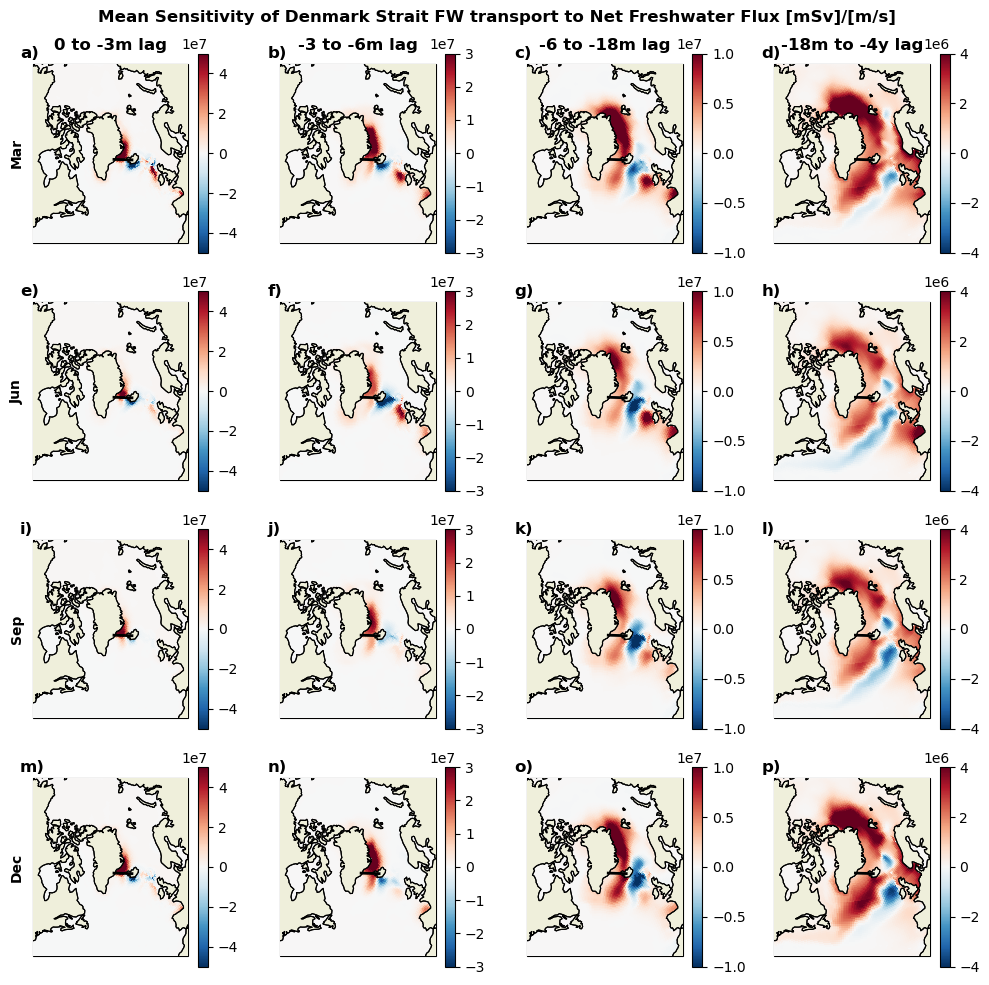

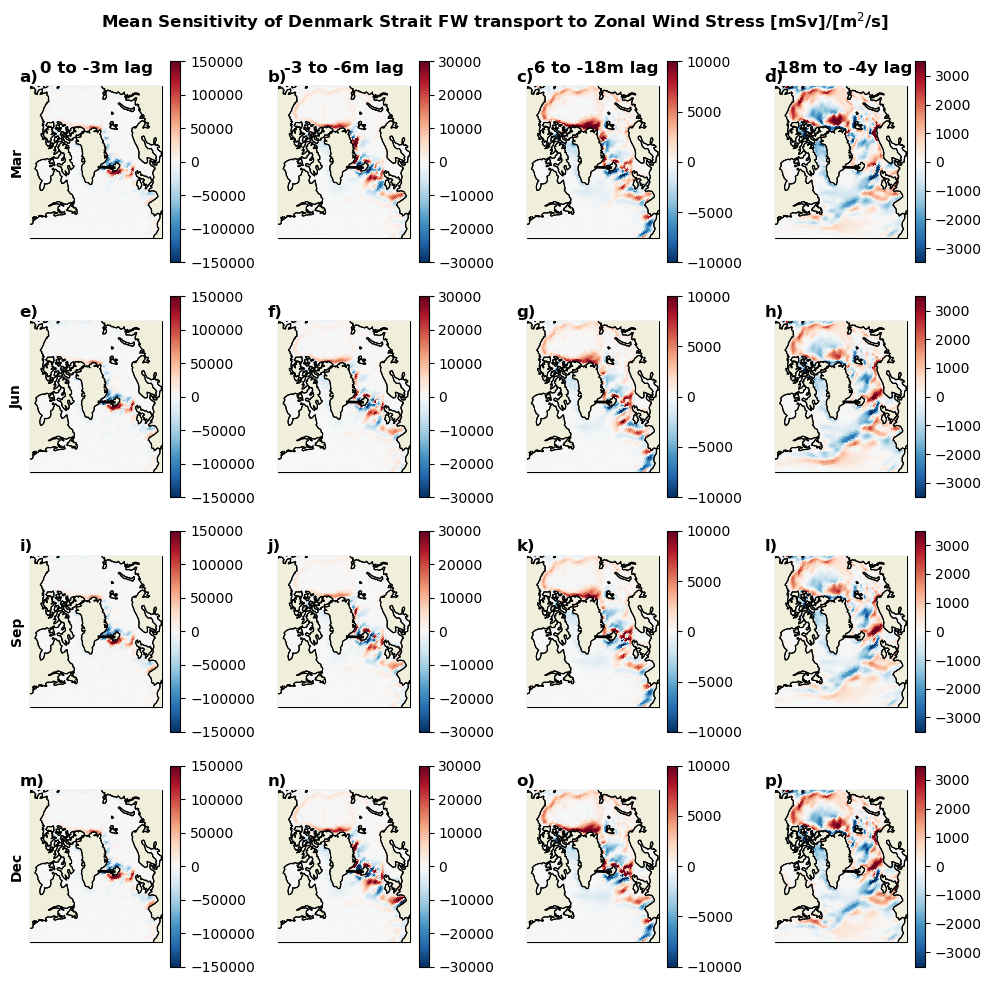

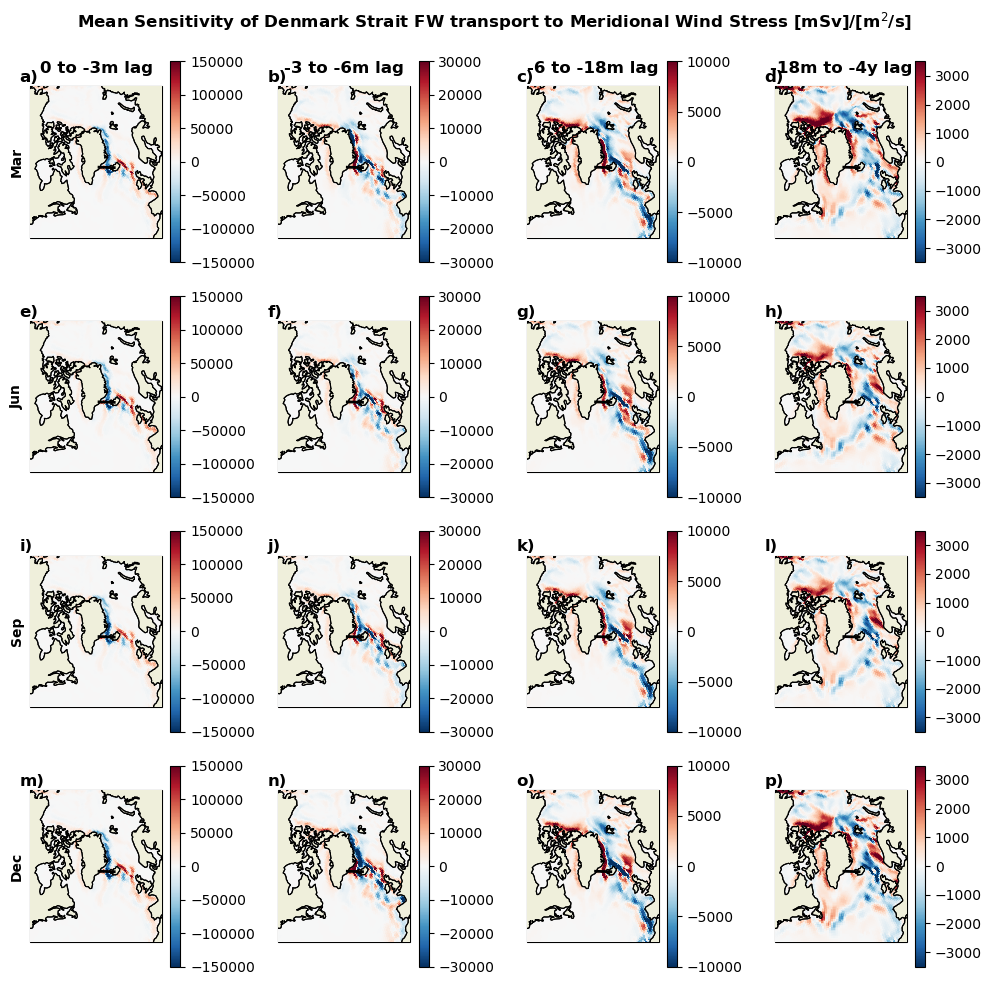

In [36]:
mth_i=[3,6,9,12]
for iv,var in enumerate(adj_vars): 
    fig=plt.figure(figsize=[10,10])
    pp=1
    if 'tau' in var:
        mth_plot=-1e3*ds_plot_all[var].mean('eyear')
    else:
        mth_plot=1e3*ds_plot_all[var].mean('eyear')  
    for month in mth_i:
        for ilag in range(0,len(lags)-1):
            [f,ax,p]=ut.plot_ecco(ecco_grid,mth_plot.isel(lag_range=ilag).sel(month=imth[month]),subplot_grid=[4,4,pp],
                               **proj_dict,rasterized=True,
                               cmin=-clims[var][ilag]*1e3,cmax=clims[var][ilag]*1e3
                              )
            ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
            ax.plot([section_pt1[0],section_pt2[0]],[section_pt1[1],section_pt2[1]],
                 color='k', linewidth=2,transform=ccrs.PlateCarree(),zorder=1000)
            plt.text(-0.08,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
            if pp<5:
                plt.title(lag_labels[ilag],fontsize=12,fontweight='bold',y=1.03)
            if ilag==0:
                ax.text(-0.1,0.5,imth[month],transform=ax.transAxes,rotation='vertical',ha='center',va='center',fontweight='bold')
            pp+=1
    
    plt.suptitle(f'Mean Sensitivity of Denmark Strait FW transport to {exf_labels[var]} [mSv]/[{exf_units[var]}]',fontsize=12,fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'../plots/suppfig_{var}_vslag_vsmonth.pdf')

In [3]:
ds_all=[]
for mth in mths:
    ds_mth=[]
    for year in eyears:
        expt=f'ad_5y_denstr_horflux_fw_{mth}_noparam_7d_{year}'
        ds_mth.append(xr.open_dataset(f'{EXPDIR}/{expt}/{expt}_stats.nc'))
    ds_all.append(xr.concat(ds_mth,'eyear'))
ds_all=xr.concat(ds_all,'month')
#ds_all

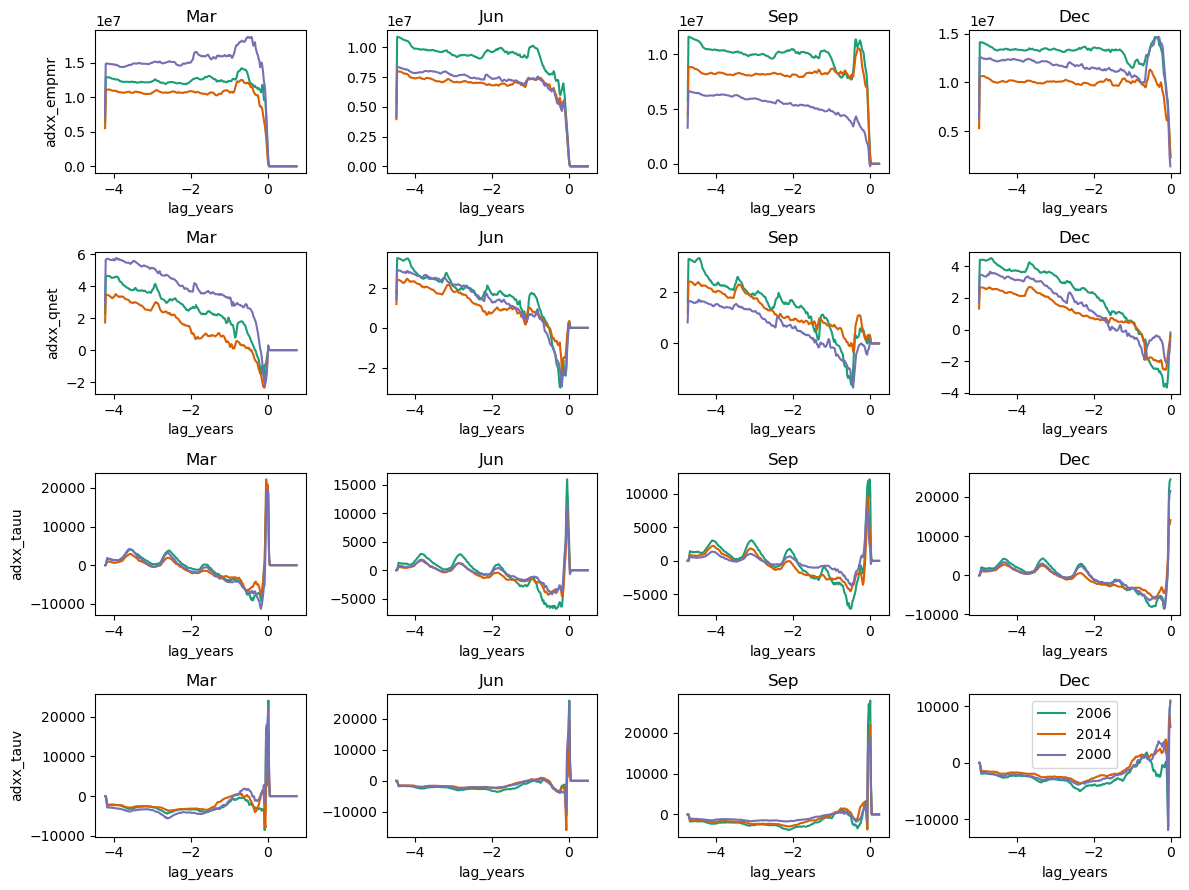

In [16]:
plt.figure(figsize=[12,9])
cmap=plt.get_cmap('Dark2')
stat='sum'
pp=1
for var in ds_all:
    for im,month in enumerate(mths):
        plt.subplot(4,4,pp)
        for ey,eyear in enumerate(eyears):
            ds_all[var].sel(month=month,eyear=eyear,stat=stat).dropna('lag_years').plot(x='lag_years',color=cmap(ey))
        plt.title(f'{month}')
        if im>0:
            plt.ylabel('')
        pp+=1
plt.tight_layout()
plt.legend(eyears)

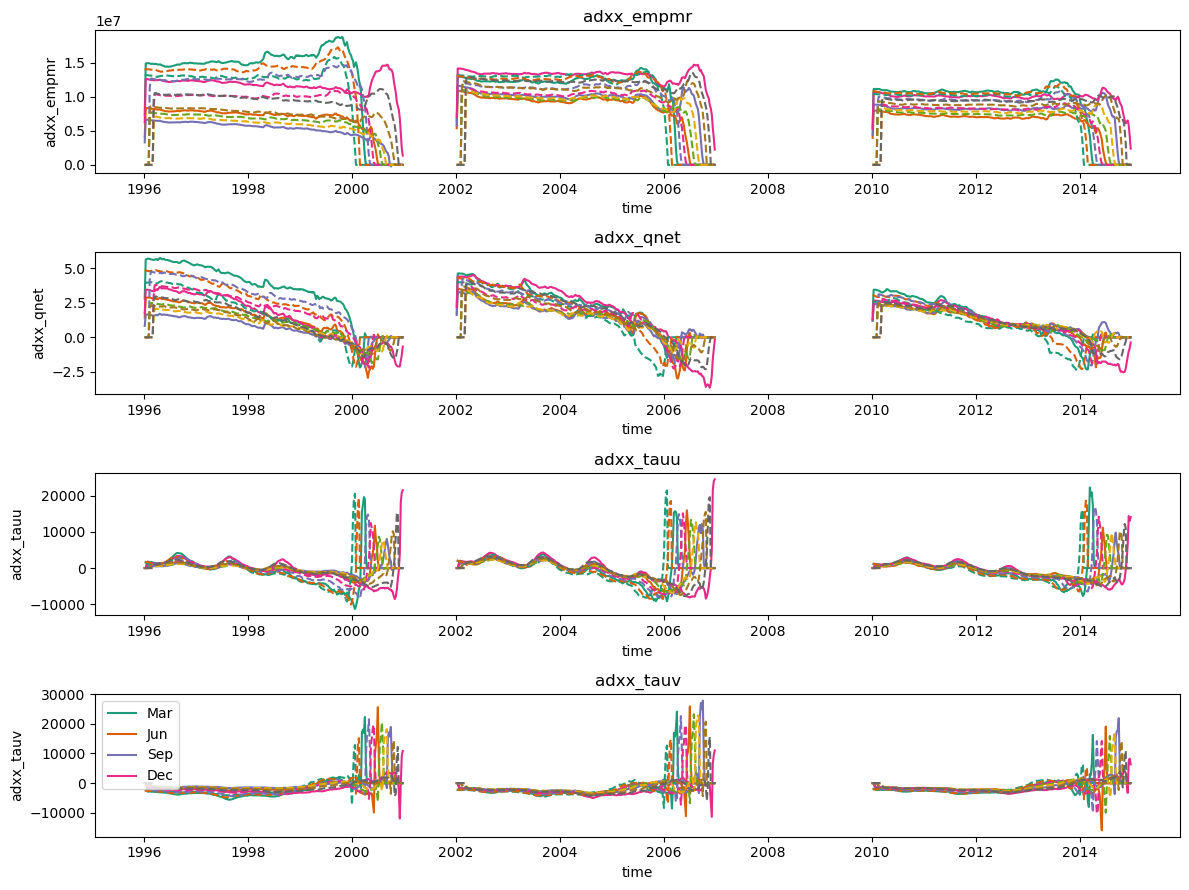

In [6]:
cmap=plt.get_cmap('Dark2')
plt.figure(figsize=[12,9])
stat='sum'
pp=1
for var in ds_all:
    plt.subplot(4,1,pp)
    for eyear in eyears:
        for im,month in enumerate(mths):
            ds_all[var].sel(month=month,eyear=eyear,stat=stat).dropna('lag_years').plot(x='time',color=cmap(im))
        plt.title(var)
    pp+=1
plt.tight_layout()
plt.legend(mths)